In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier 

ohe = pd.read_csv('data/ohe.csv')
to_drop_feats = ['district','gps','water','wpt','public','ward','permit','subvillage','recorded']
to_drop_cols = []
for col in ohe.columns:
    if col.split('_')[0] in to_drop_feats: to_drop_cols.append(col)
ohe.drop(to_drop_cols,axis=1,inplace=True)
target = pd.read_csv('data/labels.csv')['translate']


rus = RandomUnderSampler(random_state=13)
X_resampled, y_resampled = rus.fit_resample(ohe, target)

X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled,test_size = .25,random_state=13)
y_resampled.value_counts()

2    4317
1    4317
0    4317
Name: translate, dtype: int64

In [3]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_hat_all = rf.predict(ohe)
accuracy_score(target,y_hat_all)

0.7192255892255892

In [7]:
clf = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20,30, None],
    'min_samples_split': [5, 10, 20]
}

gs_tree = GridSearchCV(clf, param_grid, cv=4)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}

In [2]:
rf = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_split=10)
rf.fit(X_train,y_train)
y_hat_all = rf.predict(ohe)
print(accuracy_score(target,y_hat_all))
y_hat_test = rf.predict(X_test)
accuracy_score(y_test,y_hat_test)

0.7136195286195286


0.7109326744904262

In [7]:
cm = np.core.defchararray.add(cnf1.astype('str'),'%')
int(cm[0,0][:-1])

750

[[23.13  6.58  4.17]
 [ 5.62 25.08  3.24]
 [ 5.78  3.52 22.88]]


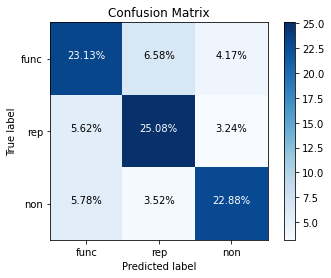

[[37.03 10.92  6.36]
 [ 0.77  6.07  0.43]
 [ 5.9   4.26 28.26]]


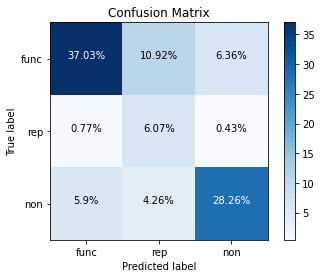

In [3]:
from cf_matrix_plot import plot_confusion_matrix
cnf1 = confusion_matrix(y_test,y_hat_test)
cnf2 = confusion_matrix(target,y_hat_all)
plot_confusion_matrix(cnf1,['func','rep','non'],normalize=True)
plot_confusion_matrix(cnf2,['func','rep','non'],normalize=True)